In [ ]:
# This is a project about credit risk analysis

In [1]:
pip install numpy pandas seaborn scikit-learn xgboost matplotlib jupyter


  Using cached numpy-2.2.6-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pandas-2.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached matplotlib-3.10.6-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-non

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%pip uninstall -y scikit-learn
%pip install scikit-learn

%pip uninstall -y xgboost
%pip install xgboost




Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.7.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp310-cp310-macosx_12_0_arm64.whl (8.7 MB)
Note: you may need to restart the kernel to use updated packages.
Found existing installation: xgboost 3.0.4
Uninstalling xgboost-3.0.4:
  Successfully uninstalled xgboost-3.0.4
Note: you may need to restart the kernel to use updated packages.
  Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option("display.max_columns", None) # This allows us to display all the columns when displaying the data

In [4]:
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv("german_credit_data.csv")

In [6]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
# To check the age distribution
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:
# This is to check the value counts of the risk column
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
# This will give us the rows and columns in the data frame
df.shape

(1000, 11)

In [10]:
# This will give us the general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
# This is to describe the entire data frame
# This shows a basic statistical description of the data frame
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [12]:
df.describe(include="all") # This will include all the available columns

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [13]:
df.describe(include= "all").T # This changes the column names to row names and vice versa (Just like a transpose)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# To check the unique values of the job
df["Job"].unique() # The numbers represent the importance of the roles!

array([2, 1, 3, 0])

In [15]:
df.isna() # This shows the record of all the null values in the frame

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isna().sum() # The shows their sums

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [17]:
# This shows the duplicated rows 
df.duplicated().sum()

np.int64(0)

In [18]:
# Drop the missing values only
df = df.dropna().reset_index(drop = True)  # This drops the rows containing the null values and then resets the index

In [19]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

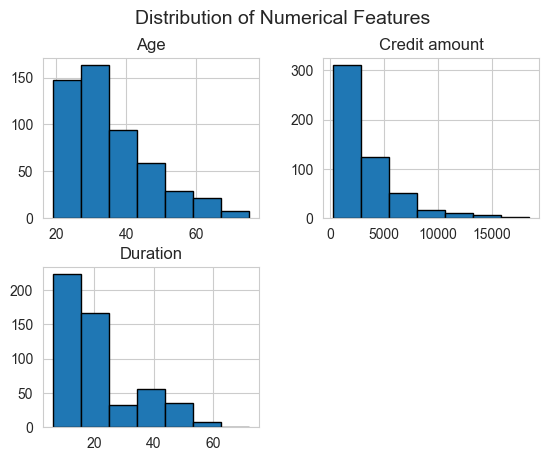

In [20]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 7, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 14 )
plt.show()

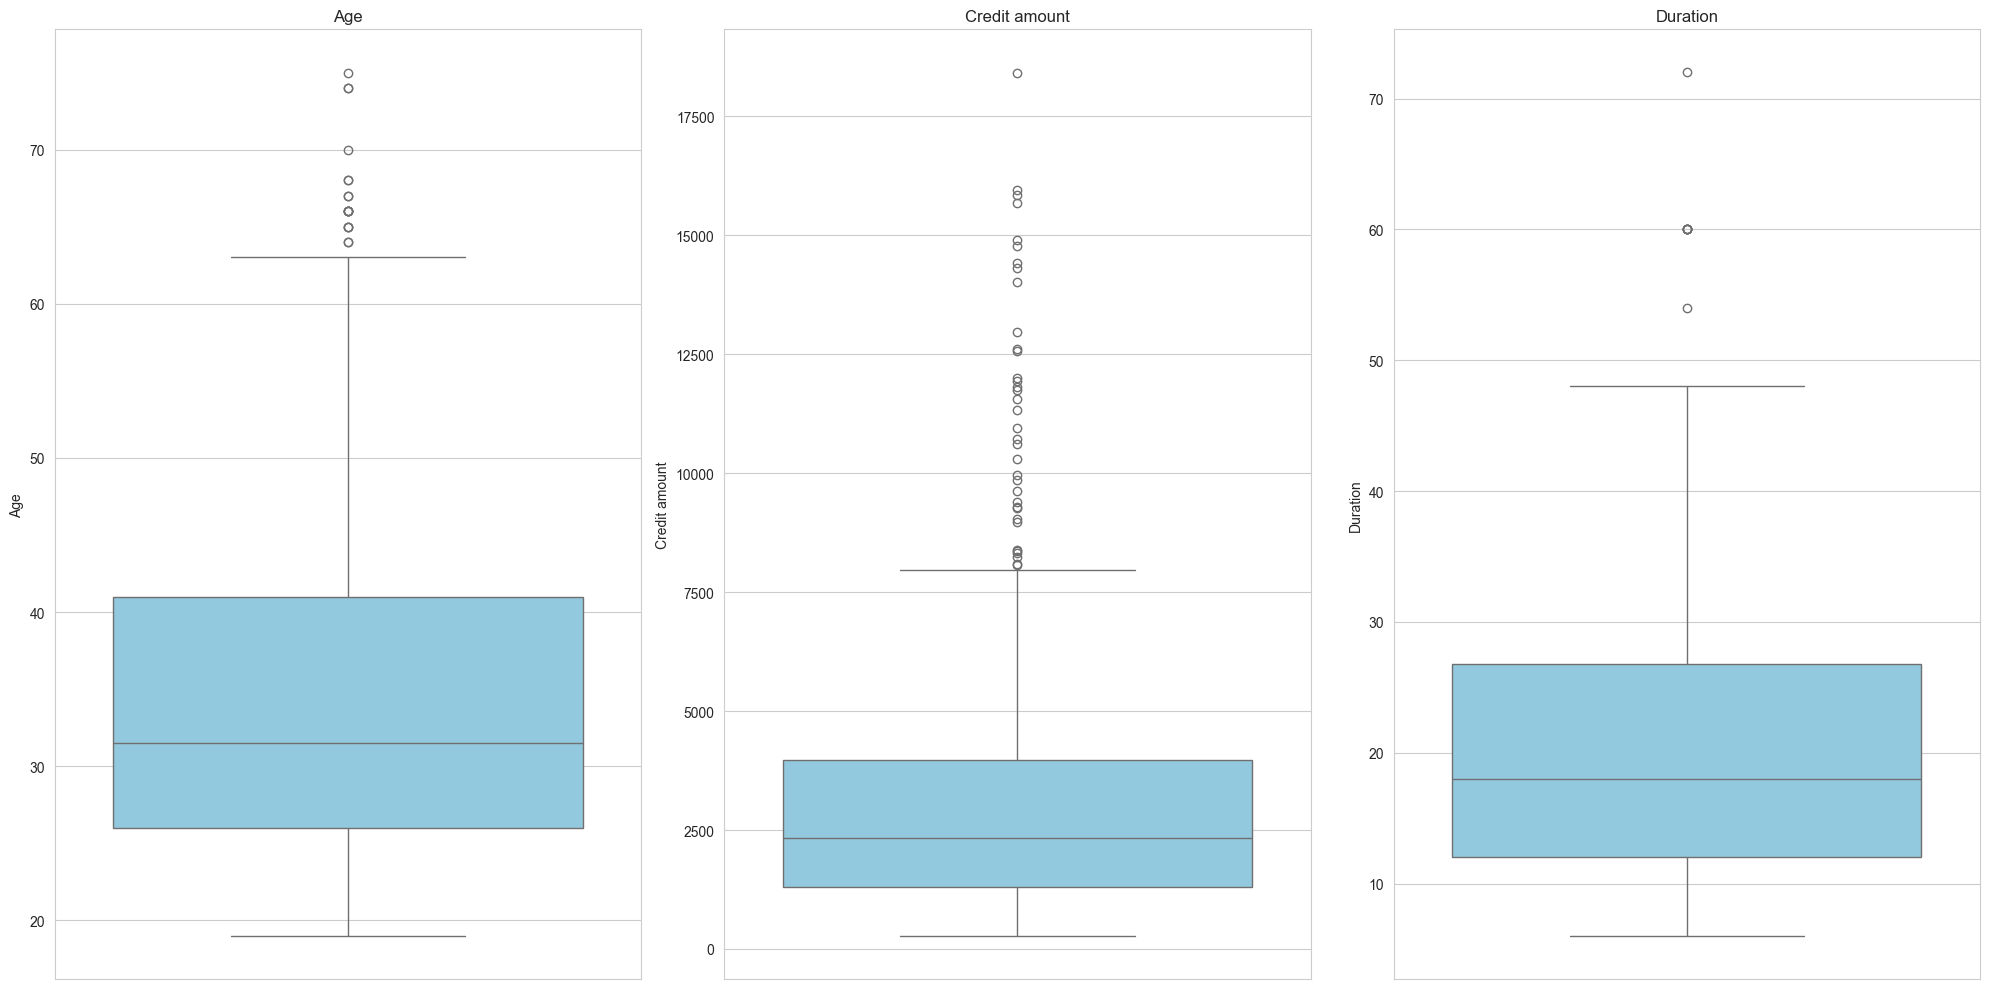

In [21]:
plt.figure(figsize = (20,10)) # This is to set the are of construction
for i, col in enumerate(["Age","Credit amount", "Duration" ]):
    plt.subplot(1,3 , i+1)
    sns.boxplot(y=df[col], color = "skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


In [22]:
# Then this is to treat the data frame like an SQL Table to query
df.query("Duration >= 60")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,29,63,male,2,own,little,little,6836,60,business,bad
176,332,24,female,3,own,moderate,moderate,7408,60,car,bad
199,374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,714,27,male,3,own,little,moderate,14027,60,car,bad
489,938,42,male,2,free,little,moderate,6288,60,education,bad
507,973,36,male,2,rent,little,little,7297,60,business,bad


In [23]:
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/728799893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = "Set2", order = df[col].value_counts().index)
/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/728799893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = col, palette = "Set2", order = df[col].value_counts().index)
/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/728799893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = d

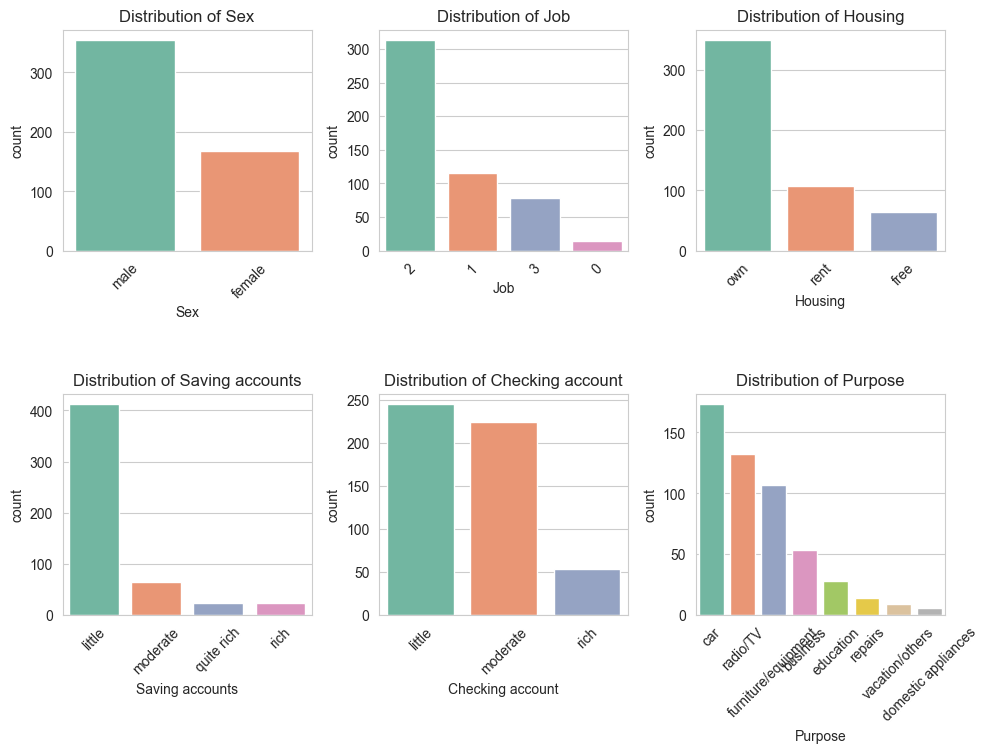

In [24]:
plt.figure(figsize = (10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df, x = col, palette = "Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [25]:
# This is to check the correlation of 4 related columns
corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()

In [26]:
corr # Here we get a table showing the correlation of the columns against one another

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


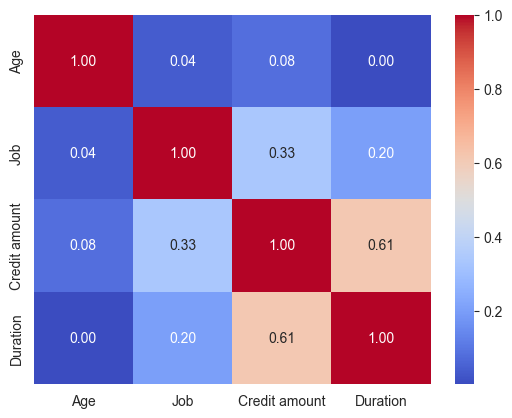

In [27]:
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
# This annotates it, gives it a cool warm colour and formats the numbers to 2 decimal places
plt.show()

In [28]:
# This will analyze a column based on the classification of another

In [29]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [30]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [31]:
# This is to create a pivot table! - The pivot table is from the pandas library!
pd.pivot_table(df, values = "Credit amount", index = "Housing", columns="Purpose")


Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


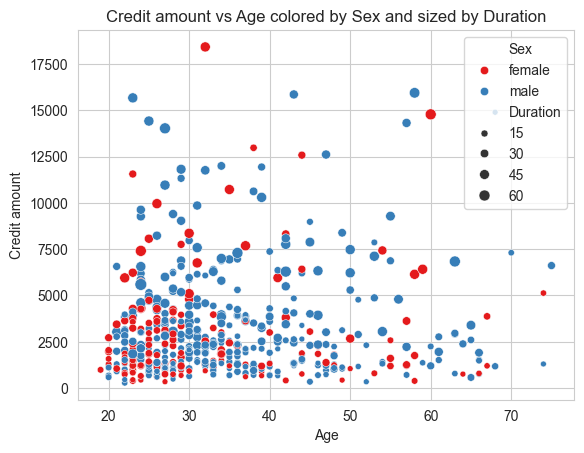

In [32]:
# This is to create a scatter plot using the seaborn library
sns.scatterplot(data = df, x = "Age", y = "Credit amount", hue = "Sex", size = "Duration", palette = "Set1" )
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/3666218193.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount",palette = "Pastel1"  )


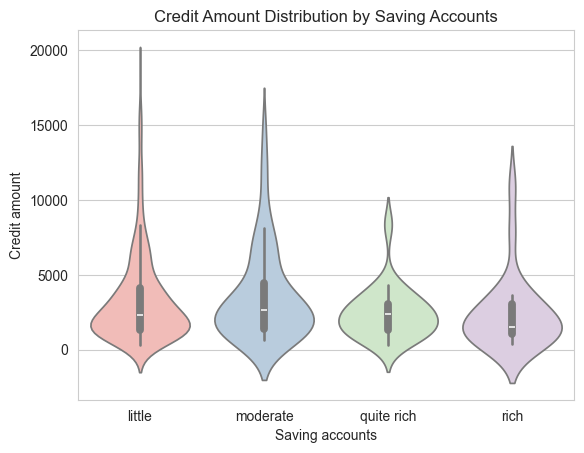

In [33]:
sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount",palette = "Pastel1"  )
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [34]:
df["Risk"].value_counts(normalize= True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/2641042462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette="Pastel2")
/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/2641042462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette="Pastel2")
/var/folders/x0/g5d5m7fs7616s3x9yqm5r09m0000gn/T/ipykernel_18301/2641042462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y = col, palette="Pastel2")


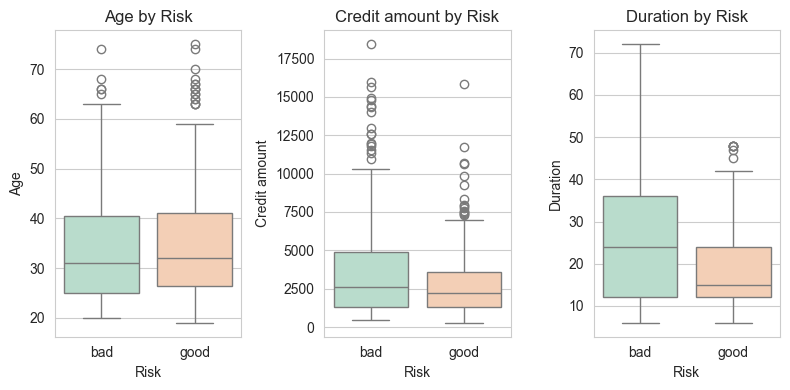

In [35]:
plt.figure(figsize= (8,4) )
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = "Risk", y = col, palette="Pastel2")
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()

In [36]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [37]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

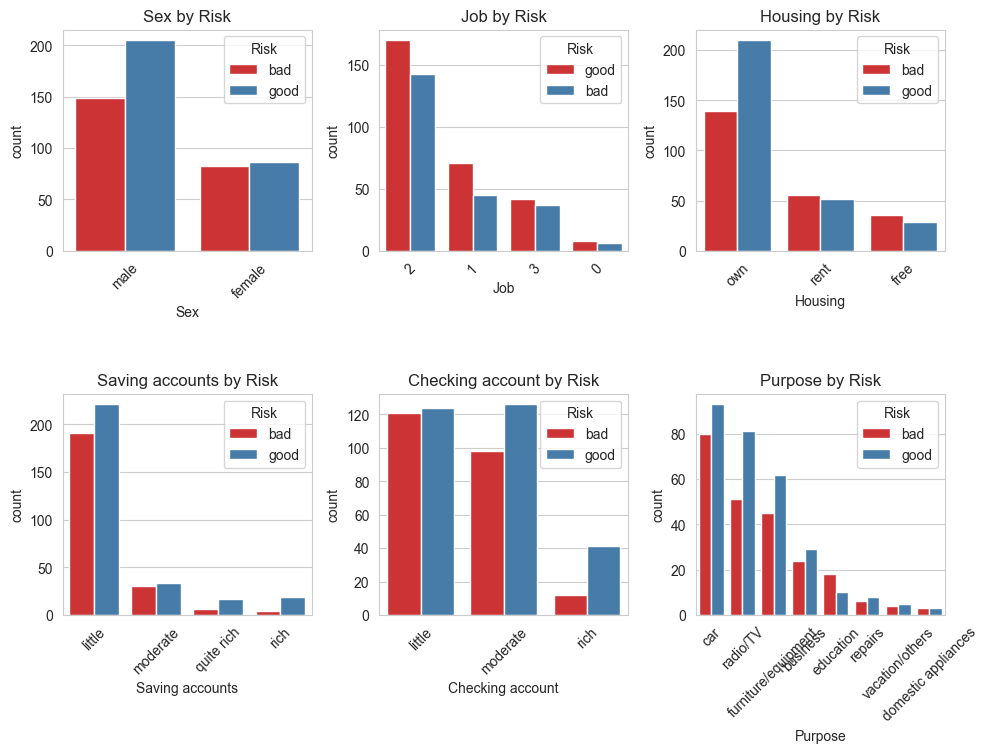

In [38]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df, x = col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [40]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration" ]

In [41]:
target = "Risk"

In [42]:
df_model = df[features + [target]].copy()

In [43]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [44]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [45]:
cat_cols = df_model.select_dtypes(include = "object").columns.drop("Risk")

In [46]:
le_dict = {}  # This is 

In [47]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [48]:
for col in cat_cols:
    le = LabelEncoder() # The encoder categorises column values into integer values for better differentiation
    df_model[col] = le.fit_transform(df_model[col]) # This will transform the column values into numeric labels - This then replaces the original column in "df_model" with the encoded version
    # Note that the encoder gets trained on the specific column after it has been used!
    le_dict[col] = le # This stores the encoder in the dictionary with the column name acting as the key!
    joblib.dump(le, f"{col}_encoder.pkl") # This saves the encoder object into a .pkl file using job lib

In [49]:
le_target = LabelEncoder() # This will be the one for our target column (Risk)


In [50]:
target

'Risk'

In [51]:
df_model[target] = le_target.fit_transform(df_model[target])

In [52]:
df_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [53]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [54]:
# Then to dump it!
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [55]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [56]:
# Then to import train test split
from sklearn.model_selection import train_test_split

In [57]:
# From the x axis -> We need all the columns except for the "Risk" column
X = df_model.drop(target, axis = 1)

In [58]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [59]:
# The y axis will be the risk
y = df_model[target]

In [60]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [61]:
# Then to use the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 1 ) # We can also add the "random_state" for the randomness
# Adding the random state allows us to get the same results everytime!


In [62]:
X_train.shape

(417, 8)

In [63]:
X_test.shape

(105, 8)

In [64]:
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# import Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


#import xgboost as xgb
# Grid Search
from sklearn.model_selection import GridSearchCV
# This is the accuracy score
from sklearn.metrics import accuracy_score
# Import XgBoost
from xgboost import XGBClassifier






In [65]:
import platform
print(platform.architecture())



('64bit', '')


import sys
print(sys.executable)



In [66]:
import sys
print(sys.executable)


/Users/abosede/PROJECTS/DATA SCIENCE/Credit-Risk-Modelling/.venv/bin/python


In [67]:
#from xgboost import XGBClassifier

In [68]:
# Then to train the model
def train_model (model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1 )
    # This above:
    # Tries all combinations of parameters in "param_grid"
    # Uses 5-fold cross-validation (cv = 5) to evaluate each combination
    # Scores models using accuracy
    # Runs in parallel accross all CPU cores (n_jobs = -1)
    grid.fit(X_train, y_train) # This fits the grid search object to the training data
    # Internally trains multiple models with different hyperparameter combinations
    # Finds the one with the best cross-validated accuracy

    best_model = grid.best_estimator_ # This derives the best performing model from the grid search

    y_pred = best_model.predict(X_test) # This uses the best model to predict labels for the test set!

    acc = accuracy_score(y_test, y_pred)  # This calculates the accuracy of the predictions by comparing them to the true labels

    return best_model, acc, grid.best_params_ # This returns the best model, accuracy on the test set, and the best hyperparameters found (grid.best_params_)

In [69]:
# Then to set up the model and the grid
dt = DecisionTreeClassifier (random_state = 1, class_weight= "balanced")
dt_param_grid = {
    "max_depth" : [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}
'''
max_depth -> This limits how deep the tree can grow. Prevents overfitting. None means no limit
min_samples_split -> Minimum number of samples required to split an internal node. Higher = more conservative splits
min_samples_leaf -> Minmum number of samples required to be at the leaf node. This helps smooth out predictions and reduce overfitting!
'''

'\nmax_depth -> This limits how deep the tree can grow. Prevents overfitting. None means no limit\nmin_samples_split -> Minimum number of samples required to split an internal node. Higher = more conservative splits\nmin_samples_leaf -> Minmum number of samples required to be at the leaf node. This helps smooth out predictions and reduce overfitting!\n'

In [70]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)


In [71]:
# Then to check the decision tree's accuracy
print("Decision Tree Accuracy", acc_dt)


Decision Tree Accuracy 0.580952380952381


In [72]:
# Then to check the best parameters ( In this example, it will be the decision tree)
print("Best parameters", params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [73]:
# This is to create the Random Forest -> We will use this for testing!
rf = RandomForestClassifier(random_state= 1, class_weight= "balanced", n_jobs = -1)

In [74]:
rf_param_grid = {
    "n_estimators" : [100, 200],
    "max_depth": [5,7,10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}
# For the "n_estimators" -> This controls how many decision trees the Random Forest will build
# This is telling the model to try both 100 and 200 trees during the hyperparameter tuning

In [75]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [76]:
# Then to check out the accuracy of the random forest on this data
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.6190476190476191


In [77]:
# To print the parameters related to the random forest
print("Best params", params_rf)

Best params {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [78]:
# This is to work with "EXTRA TREES" instead
et = ExtraTreesClassifier(random_state= 1, class_weight= "balanced", n_jobs=-1)

In [79]:
et_param_grid = {
    "n_estimators" : [100, 200],
    "max_depth": [5,7,10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}


In [80]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [81]:
# Then to check the accuracy!
print("Extra trees accuracy", acc_et)

Extra trees accuracy 0.6666666666666666


In [82]:
# Then to check the parameters derived!
print("Best params:", params_et)

Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [83]:
# To try the "XGBOOST algorithm"
# %pip install scikit-learn

In [84]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(), use_label_encoder = False, eval_metric = "logloss" )
# Note that the "scale_pos_weight" is just like the class weight for other algorithms

In [85]:
%pip list

Package                   Version
------------------------- --------------
anyio                     4.10.0
appnope                   0.1.4
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.5
bleach                    6.2.0
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.3
comm                      0.2.3
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
exceptiongroup            1.3.0
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.59.2
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
idna         

In [86]:
import sklearn
print(sklearn.__version__)

1.7.1


In [87]:
# Then to define the xgboost parameters
xgb_param_grid = {

    "n_estimators" : [100,200],
    "max_depth" : [3,5,7],
    "learning_rate" : [0.01, 0.1, 0.2],
    "subsample" : [0.7, 1],
    "colsample_bytree" : [0.7,1]
}

In [88]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

/Users/abosede/PROJECTS/DATA SCIENCE/Credit-Risk-Modelling/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:47:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abosede/PROJECTS/DATA SCIENCE/Credit-Risk-Modelling/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:47:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abosede/PROJECTS/DATA SCIENCE/Credit-Risk-Modelling/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:47:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/abosede/PROJECTS/DATA SCIENCE/Credit-Risk-Modelling/.venv/lib/python3.10/site-packag

In [89]:
print("XGB accuracy", acc_xgb)

XGB accuracy 0.6285714285714286


In [90]:
# Then to print the required parameters
print("Best params", params_xgb)

Best params {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}


In [91]:
# After checking all -> Then we can realize that the most accurate model that we have is "EXTRA TREES"




In [92]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [93]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")
# "best_et" is our trained model -> "joblib.dump()" saves the python object into a ".pkl" file

['extra_trees_credit_model.pkl']

In [94]:
%pip install streamlit


  Using cached streamlit-1.49.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-6.2.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached protobuf-6.32.0-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached pyarrow-21.0.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached narwhals-2.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.49.1-py3-none-any.whl (10.0 M